In [102]:
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt

In [103]:
G = nx.read_graphml('tree-84n.xml')

In [104]:
def find_root(G,child):
    parent = list(G.predecessors(child))
    if len(parent) == 0:
        return child
    else:  
        return find_root(G, parent[0])

In [105]:
def get_lchild(G, node):
    children = list(G.out_edges(node))
    if len(children) > 0:
        return children[0][1]
    else:
        return None
    
def get_rchild(G, node):
    children = list(G.out_edges(node))
    if len(children) > 1:
        return children[1][1]
    else:
        return None

In [106]:
def move_tree(G, node, delta):
    node_coordinates[node][0] += delta
    if get_lchild(G, node):
        move_tree(G, get_lchild(G, node), delta)
    if get_rchild(G, node):
        move_tree(G, get_rchild(G, node), delta)

In [107]:
def layered_tree_draw(G, node, level):
    if not get_lchild(G, node):
        node_coordinates[node] = [0, level]
        return {level: [0, 0]}
    if get_rchild(G, node):
        lcont = layered_tree_draw(G, get_lchild(G, node), level+1)
        rcont = layered_tree_draw(G, get_rchild(G, node), level+1)
        min_deep = min(len(rcont), len(lcont))
        max_deep = max(len(rcont), len(lcont))
        delta = lcont[level+1][1] - rcont[level+1][0]
        if node == 'n31':
            print('delta', delta)
        for l in range(level + 1, level + min_deep + 1):
            if lcont[l][1] - rcont[l][0] > delta:
                delta = lcont[l][1] - rcont[l][0]
        delta += 2
        move_tree(G, get_rchild(G, node), delta)
        x = (node_coordinates[get_lchild(G, node)][0] + node_coordinates[get_rchild(G, node)][0]) / 2
        node_coordinates[node] = [x, level]
        for l in rcont:
            rcont[l][0] += delta
            rcont[l][1] += delta
        if max_deep == len(lcont):
            cont = lcont.copy()
        else:
            cont = rcont.copy()
        cont[level] = [x, x]
        for l in range(level+1, level + min_deep + 1):
            cont[l] = [lcont[l][0], rcont[l][1]]
        return cont
    if get_lchild(G, node):
        lcont = layered_tree_draw(G, get_lchild(G, node), level+1)
        x = node_coordinates[get_lchild(G, node)][0]
        node_coordinates[node] = [x, level]
        cont = lcont.copy()
        cont[level] = [x, x]
        return cont

In [108]:
node_coordinates = {}
for n in G.nodes():
    node_coordinates[n] = [0, 0]
cont = layered_tree_draw(G, 'n0', 0)

In [109]:
width = 0
for l in cont:
    if cont[l][1] > width:
        width = cont[l][1]
deep = 0
for n in G.nodes():
    if node_coordinates[n][1] > deep:
        deep = node_coordinates[n][1]
        
for n in G.nodes():
    node_coordinates[n][1] = deep - node_coordinates[n][1]

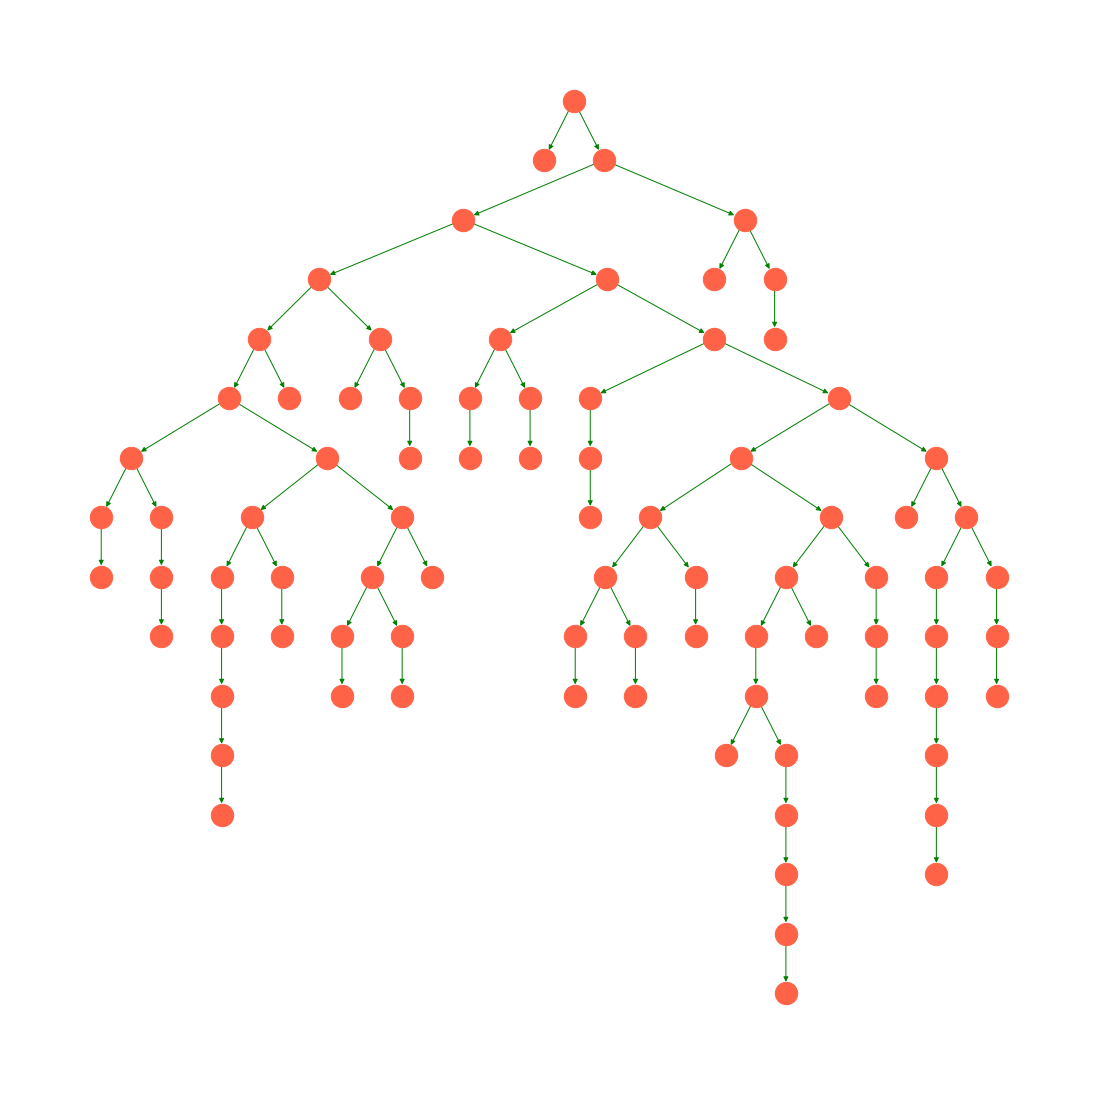

In [112]:
plt.figure(figsize=(width, deep))
nx.draw(G, pos=node_coordinates, with_labels=False, node_color='tomato', edge_color='green', node_size=500)
plt.savefig('graph.png')